In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_order_items = pd.read_csv('data\olist_order_items_dataset.csv')

In [3]:
data_order_items.shape

(112650, 7)

In [4]:
data_order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [9]:
'No sabemos qué será el id del item, si ya tenemos el del producto y el de la orden. Pero se puede ver que está demasiado desbalanceado, casi todos corresponden al item 1'

data_order_items.order_item_id.value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

In [11]:
data_order_items.duplicated().sum()

0

In [12]:
data_order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [13]:
data_order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

Convertir shipping_limit_date de objetct a date

c:\Users\leand\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


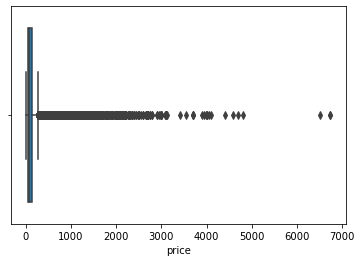

In [16]:
sns.boxplot(data_order_items.price)
plt.show()

Están dentro de los parámetros racionales los precios outliers de los items

c:\Users\leand\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


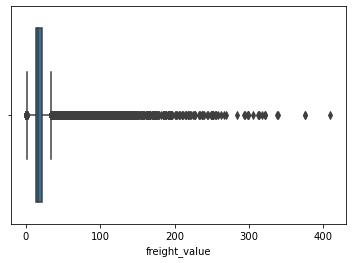

In [17]:
'Precio del flete'

sns.boxplot(data_order_items.freight_value)
plt.show()


In [19]:
data_order_items.freight_value.max()

409.68

Raro. 400 reales son 10 lucas, parece mucho para un flete. Salvo que te lo lleve Bolsonaro a tu casa

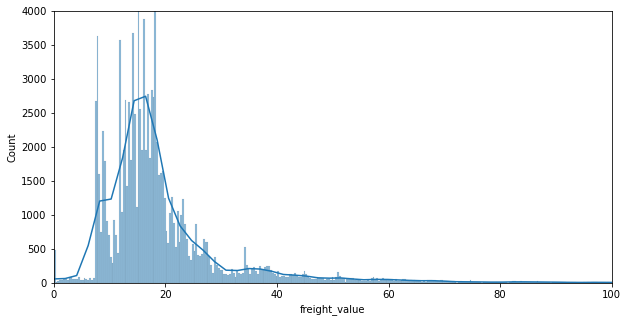

In [46]:
plt.figure(figsize= (10,5))

sns.histplot(data_order_items.freight_value, kde = True)
plt.axis([0, 100, 0, 4000])
plt.show()

In [26]:
'Tiene sentido que los fletes sean tan caros considerando el precio del producto'

data_order_items[data_order_items.freight_value > 300]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3303,076d1555fb53a89b0ef4d529e527a0f6,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2018-08-07 04:35:22,2338.08,375.28
3584,0822bcde10bb5d023755a71bc8f7797f,1,363a9f5b97bf194da23858be722a7aa5,9596c870880d900012f2e8e6e30d06d7,2018-05-10 23:52:39,990.00,321.46
5037,0b6230647ed16f4b3e70282dc4b5b87f,1,46e24ce614899e36617e37ea1e4aa6ff,17f51e7198701186712e53a39c564617,2018-06-01 19:14:24,1050.00,321.88
6268,0e4672661531addf3fa0f55961e55242,1,dc861f18267cce21f3b70f9f7990b8ce,17f51e7198701186712e53a39c564617,2017-07-12 04:03:18,990.00,314.02
16731,264a7e199467906c0727394df82d1a6a,1,97c948ebc8c04b26b7bbb095d4228f2a,17f51e7198701186712e53a39c564617,2018-04-23 17:15:10,1050.00,338.30
27183,3dd5626c63f493f8b8f8788c2be24baa,1,3a1855685a49813f60e6193864f7215e,c510bc1718f0f2961eaa42a23330681a,2018-05-04 19:50:59,2699.00,306.06
28044,3fde74c28a3d5d618c00f26d51baafa0,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2018-08-22 03:15:09,2338.08,375.28
29787,43bdbd9dc0931d72befdf4765af6c442,1,7e53e051875b2a0c9f22acd8a9a29a20,eeb6de78f79159600292e314a77cbd18,2018-07-12 08:35:21,3089.00,317.47
48320,6ddfbf514959b49b6410c01ad93054bb,1,363a9f5b97bf194da23858be722a7aa5,9596c870880d900012f2e8e6e30d06d7,2017-11-30 15:10:57,1045.00,314.40
69797,9f49bd16053df810384e793386312674,1,256a9c364b75753b97bee410c9491ad8,5c030029b5916fed0986310385ec9009,2018-08-02 03:44:28,1149.00,339.59


In [29]:
'Vemos casos donde el precio del flete es bastante alto para lo que sale el producto'

data_order_items[data_order_items.freight_value > 100]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
865,02014f2495eef0e869616829d481d743,1,43cc8e4d981bc04b9d78b12e8a908d41,6061155addc1e54b4cfb51c1c2a32ad8,2018-08-24 11:05:25,1240.00,102.63
1084,028558cddca332b40b4ac4cb77407edf,1,a233df9a388d27dbdfd31731d4236db0,784ba75dd9d20200c4caed3d7a77141a,2017-07-04 10:35:09,2649.99,134.17
1122,029c545413b10a6bd7540401f6eef0a3,1,8d4e92265a16e69a1e1d76e67e46d72f,54219883e72aad869adfb2a54b7bfa0f,2018-07-17 09:30:15,1350.00,294.76
1282,02fab07a655ce404330d65b508f32d9e,1,63c4a70e0a12b4bd9475fca9e9937e76,d66c305afaec317ebee552073a674429,2017-05-25 14:55:17,122.99,164.98
1453,03572de4ee0598b00c48f6de965fcf78,1,e303dfa61ada1f0823b4775f192606b3,058cb5aeb36d7c0fcae20fc85d5e0a59,2018-08-01 14:04:22,148.50,165.32
...,...,...,...,...,...,...,...
111858,fe1a4e86595ca403c258c586e8fd99c4,1,a9561ee69e9f8808eb4add53d720a447,d2374cbcbb3ca4ab1086534108cc3ab7,2018-08-23 18:55:10,189.90,148.88
111957,fe579bd413f722e51bc98182441e135c,1,4aa52adb5489aa151e17023d4e153297,f45122a9ab94eb4f3f8953578bc0c560,2017-05-17 17:10:13,1878.33,102.38
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21
112359,ff3e501f56dcf0752578d86df833558f,1,608af629c5b520efe1caf06e1cfc4abc,5dceca129747e92ff8ef7a997dc4f8ca,2017-10-27 21:14:33,299.90,170.11


In [30]:
data_order_items[data_order_items.freight_value > 400]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
73486,a77e1550db865202c56b19ddc6dc4d53,1,ec31d2a17b299511e7c8627be9337b9b,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-25 06:55:13,979.0,409.68


Ideas:

+ Podemos sacar alto KPI con el precio del flete respecto al producto
+ Se puede crear una columna con el porcentaje del precio del flete respecto al valor del producto, para considerar rentabilidad de la transacción




+ Consideren qué hacer con esos outliers del precio del flete. Por ahora, nosotros los dejaríamos ya que no están necesariamente mal

Convertir shipping_limit_date de objetct a date